In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='Malgun Gothic')
import warnings
warnings.filterwarnings("ignore")

In [2]:
세종시_버스인원 = pd.read_csv('./행정동_joined/1720_버스인원.csv')

### 행정동 기준으로 데이터를 병합시켜주었습니다

In [3]:
세종시_버스인원['행정구역'] = 세종시_버스인원.행정구역.str.replace('가람동', '한솔동')
세종시_버스인원['행정구역'] = 세종시_버스인원.행정구역.str.replace('어진동', '도담동')
세종시_버스인원['행정구역'] = 세종시_버스인원.행정구역.str.replace('다정동', '새롬동')
세종시_버스인원['행정구역'] = 세종시_버스인원.행정구역.str.replace('나성동', '새롬동')
세종시_버스인원['행정구역'] = 세종시_버스인원.행정구역.str.replace('반곡동', '소담동')

### 반포면은 세종시 행정구역이 아니기 때문에 제거했습니다

In [4]:
idx = 세종시_버스인원[세종시_버스인원['행정구역'] == "반포면"].index
세종시_버스인원 = 세종시_버스인원.drop(idx)

### 마지막 행은 전체 합계 데이터기 때문에 제거 하였습니다

In [5]:
세종시_버스인원_총이용인원 = 세종시_버스인원.iloc[-1,:]
세종시_버스인원 = 세종시_버스인원.iloc[:-1,:]

### 행정동 별로 값을 구하기 때문에 의미가 합계 행을 제거 하였습니다

In [6]:
idx = 세종시_버스인원[세종시_버스인원['행정구역'] == "합계"].index
세종시_버스인원 = 세종시_버스인원.drop(idx)

## 군집 추가

In [9]:
A = ['아름동', '연동면', '연서면', '금남면', '고운동', '도담동', '종촌동','조치원읍', '연기면']
B = ['전동면', '부강면', '소정면', '전의면', '장군면']
C = ['소담동', '한솔동', '새롬동', '대평동', '보람동']

In [10]:
cluster_number = []
for i in 세종시_버스인원.행정구역 :
    if i in A :
        cluster_number.append('A')
    elif i in B :
        cluster_number.append('B')
    elif i in C : 
        cluster_number.append('C')
세종시_버스인원['군집번호'] = cluster_number

In [12]:
세종시_버스인원.to_csv('./행정동_joined/세종시_버스인원.csv', index = False)

## 연도별 행정동의 버스인원의 추이를 보기 위해 
## 연도 열을 추가해 주었습니다

In [7]:
세종시_버스인원['연도'] = 세종시_버스인원.일자.str[0:4]

In [8]:
세종시_버스인원['승차'] = 세종시_버스인원['승차'].str.replace(pat=r'[^\w]', repl=r'', regex=True)
세종시_버스인원['하차'] = 세종시_버스인원['하차'].str.replace(pat=r'[^\w]', repl=r'', regex=True)
세종시_버스인원['환승'] = 세종시_버스인원['환승'].str.replace(pat=r'[^\w]', repl=r'', regex=True)
#,없애줌

In [9]:
세종시_버스인원 = 세종시_버스인원.fillna(0)

In [10]:
세종시_버스인원['승차'] = 세종시_버스인원.승차.astype(int)
세종시_버스인원['하차'] = 세종시_버스인원.하차.astype(int)
세종시_버스인원['환승'] = 세종시_버스인원.환승.astype(int)

In [11]:
승차 = pd.pivot_table(세종시_버스인원, index = '행정구역', columns = '연도', values = '승차' , aggfunc = 'sum').reset_index()
하차 = pd.pivot_table(세종시_버스인원, index = '행정구역', columns = '연도', values = '하차' , aggfunc = 'sum').reset_index()
환승 = pd.pivot_table(세종시_버스인원, index = '행정구역', columns = '연도', values = '환승' , aggfunc = 'sum').reset_index()

In [12]:
행정동별 = 승차+하차+환승
행정동별['행정구역'] = 행정동별.행정구역.str[0:3]
행정동별['행정구역'] = 행정동별.행정구역.str.replace('조치원', '조치원읍')

In [13]:
행정동별['증감율'] =(( 행정동별['2020'] - 행정동별['2017'] ) / 행정동별['2017'])* 100

In [14]:
행정동별.sort_values('증감율').head()

연도,행정구역,2017,2018,2019,2020,증감율
2,대평동,375907,518129,1381561,1091579,190.385388
17,종촌동,325903,506267,1295201,948219,190.951295
1,금남면,183537,244089,683573,562023,206.217820
18,한솔동,550580,860768,2322807,1778972,223.108722
12,연서면,80318,109315,334031,271234,237.700142


## Barplot으로 행정구역 별 버스이용객 증감율을 비교하였습니다

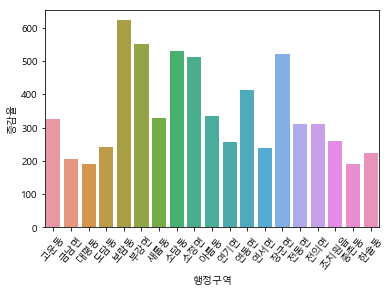

In [15]:
sns.barplot(행정동별['행정구역'], 행정동별['증감율'])
plt.xticks(rotation = 50);

In [16]:
행정동별.to_csv('./행정동_joined/세종시_행정동별_연도별_버스이용객_증감율.csv', index =False)